### Importação dos dados



In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

In [4]:
faturamento_total = df["Preço"].sum()

print(f"Faturamento total: R$ {faturamento_total:,.2f}")

Faturamento total: R$ 5,871,490.79


# 2. Vendas por Categoria


In [7]:
faturamento_por_categoria = df.groupby("Categoria do Produto")["Preço"].sum()
print(faturamento_por_categoria)


Categoria do Produto
brinquedos                 98140.86
eletrodomesticos         1766337.03
eletronicos              2214099.72
esporte e lazer           190635.39
instrumentos musicais     465029.67
livros                     50260.74
moveis                   1010214.00
utilidades domesticas      76773.38
Name: Preço, dtype: float64


# 3. Média de Avaliação das Lojas

In [14]:
loja1 = pd.read_csv(url)
loja1["Loja"] = "Loja 1"

loja2 = pd.read_csv(url2)
loja2["Loja"] = "Loja 2"

loja3 = pd.read_csv(url3)
loja3["Loja"] = "Loja 3"

loja4 = pd.read_csv(url4)
loja4["Loja"] = "Loja 4"

df = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

In [15]:
media_avaliacao = df.groupby("Loja")["Avaliação da compra"].mean().round(2)
print(media_avaliacao)

Loja
Loja 1    3.98
Loja 2    4.04
Loja 3    4.05
Loja 4    4.00
Name: Avaliação da compra, dtype: float64


# 4. Produtos Mais e Menos Vendidos

In [16]:
produto_maisvendido = df["Produto"].value_counts().idxmax()
print("Produto mais vendido:", produto_maisvendido)

Produto mais vendido: Cômoda


In [17]:
produto_menosvendido = df["Produto"].value_counts().idxmin()
print("Produto menos vendido:", produto_menosvendido)

Produto menos vendido: Celular ABXY


# 5. Frete Médio por Loja


In [19]:
media_frete = df.groupby("Loja")["Frete"].mean().round(2)

In [20]:
print(media_frete)

Loja
Loja 1    34.69
Loja 2    33.62
Loja 3    33.07
Loja 4    31.28
Name: Frete, dtype: float64


# Graficos

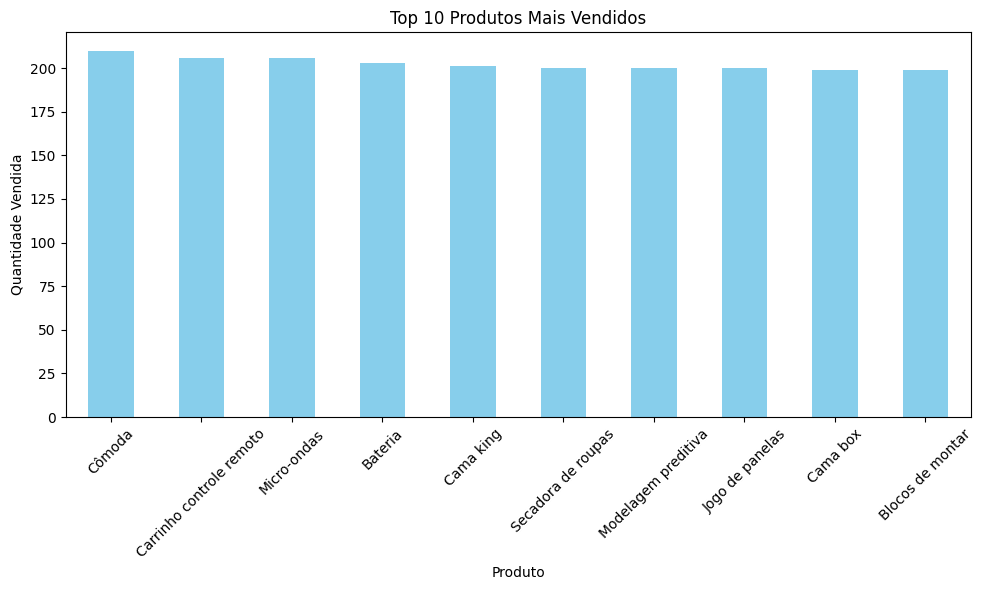

In [21]:
import matplotlib.pyplot as plt

top_produtos = df["Produto"].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_produtos.plot(kind="bar", color="skyblue")
plt.title("Top 10 Produtos Mais Vendidos")
plt.xlabel("Produto")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


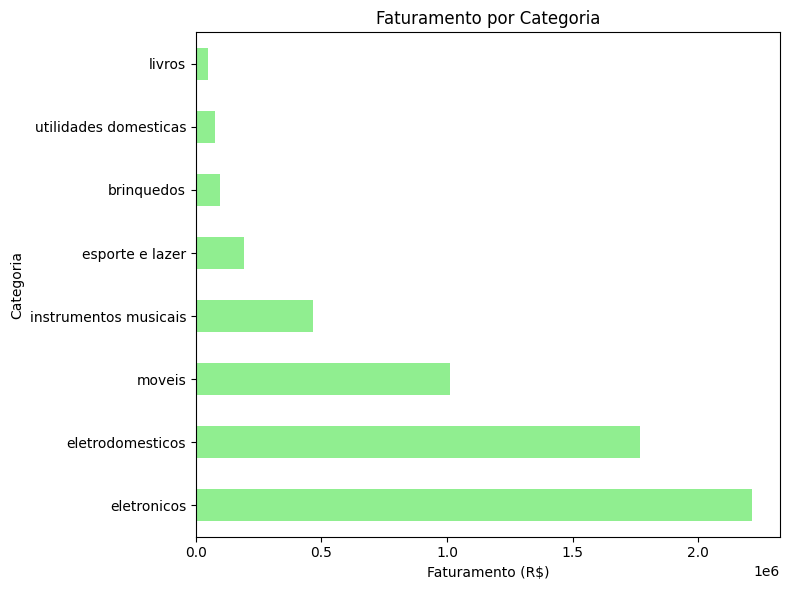

In [22]:
faturamento_categoria = df.groupby("Categoria do Produto")["Preço"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
faturamento_categoria.plot(kind="barh", color="lightgreen")
plt.title("Faturamento por Categoria")
plt.xlabel("Faturamento (R$)")
plt.ylabel("Categoria")
plt.tight_layout()
plt.show()


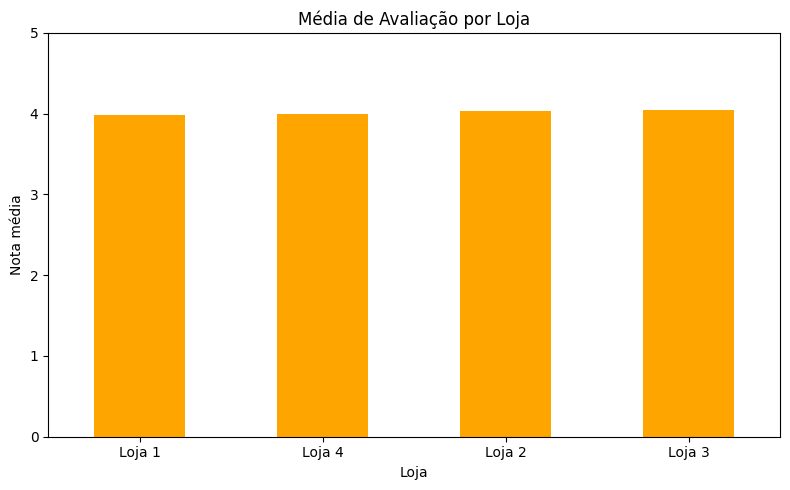

In [23]:
media_avaliacao = df.groupby("Loja")["Avaliação da compra"].mean().sort_values()

plt.figure(figsize=(8, 5))
media_avaliacao.plot(kind="bar", color="orange")
plt.title("Média de Avaliação por Loja")
plt.ylabel("Nota média")
plt.ylim(0, 5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1626970878.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vendas_mensais = df.resample("M", on="Data da Compra")["Preço"].sum()


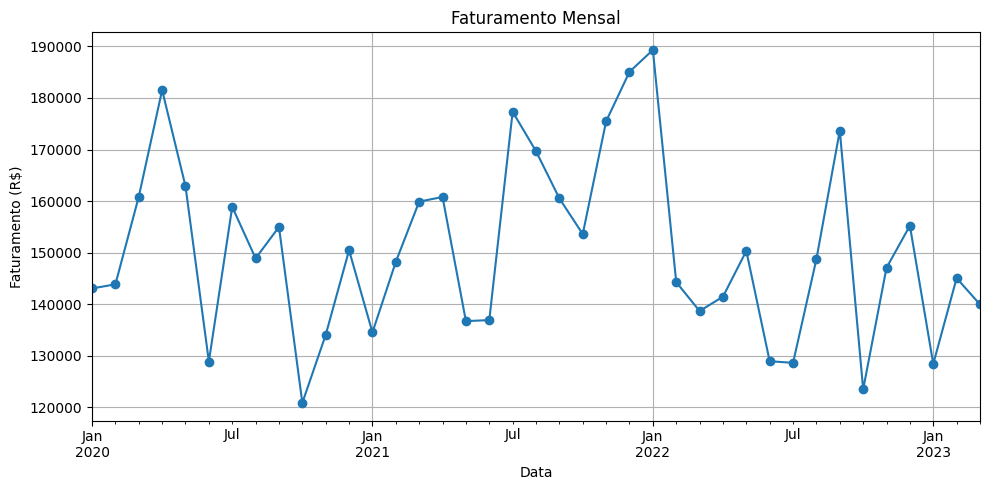

In [24]:
# Converter a coluna para datetime se ainda não estiver
df["Data da Compra"] = pd.to_datetime(df["Data da Compra"], dayfirst=True)

# Agrupar por mês
vendas_mensais = df.resample("M", on="Data da Compra")["Preço"].sum()

plt.figure(figsize=(10, 5))
vendas_mensais.plot(marker="o")
plt.title("Faturamento Mensal")
plt.xlabel("Data")
plt.ylabel("Faturamento (R$)")
plt.grid(True)
plt.tight_layout()
plt.show()


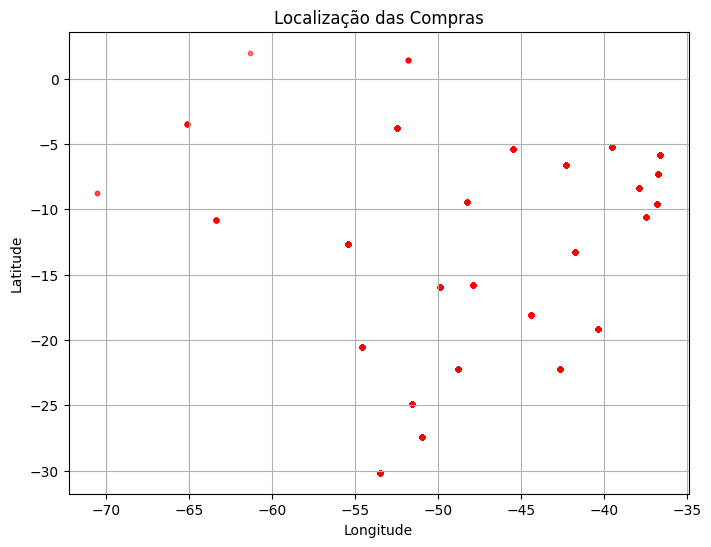

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(df["lon"], df["lat"], alpha=0.3, c="red", s=10)
plt.title("Localização das Compras")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


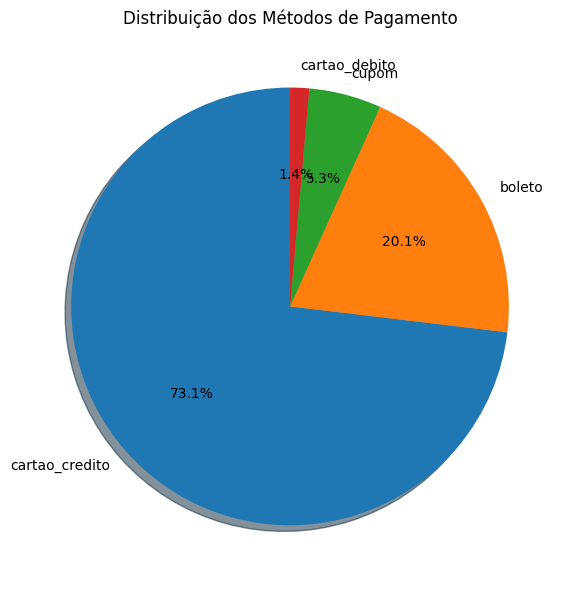

In [26]:
pagamentos = df["Tipo de pagamento"].value_counts()

plt.figure(figsize=(6, 6))
pagamentos.plot(kind="pie", autopct="%1.1f%%", startangle=90, shadow=True)
plt.title("Distribuição dos Métodos de Pagamento")
plt.ylabel("")
plt.tight_layout()
plt.show()
